<a href="https://colab.research.google.com/github/sdd261/Machine_Learning/blob/main/missing-indicator/random-sample-imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])


In [6]:
df.head()


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
df.isnull().mean() * 100


Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [8]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [10]:
X_train


,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [11]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [12]:
X_test.tail()


,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [13]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [14]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values


array([24.  , 18.  , 22.  , 16.  , 24.  , 35.  , 18.  , 45.5 , 32.  ,
       53.  , 32.  ,  4.  , 41.  , 30.  , 42.  , 24.  , 22.  , 28.  ,
       33.  , 16.  , 26.  , 48.  , 16.  , 23.  , 36.  , 39.  , 35.  ,
       62.  , 34.  , 28.  , 27.  ,  4.  , 30.  , 23.  ,  1.  , 21.  ,
       27.  , 28.  , 30.  , 23.  , 50.  , 24.  , 28.  ,  8.  , 27.  ,
       24.  , 70.  , 22.  , 37.  , 51.  , 23.5 , 24.  , 34.  , 30.  ,
       27.  ,  4.  , 39.  ,  9.  , 41.  , 29.  , 31.  ,  0.83, 31.  ,
       24.  , 60.  , 42.  , 34.5 , 32.  , 30.  , 27.  , 30.  , 35.  ,
       28.  , 17.  , 39.  , 39.  , 59.  , 32.  , 64.  , 48.  , 34.  ,
       25.  , 29.  ,  5.  , 43.  , 26.  ,  6.  , 29.  ,  4.  , 26.  ,
       26.  , 34.  , 27.  , 22.  , 18.  , 23.  , 45.  , 54.  , 18.  ,
       34.  , 28.  , 42.  , 34.  , 15.  , 47.  , 24.  , 26.  , 36.  ,
        2.  , 54.  , 63.  , 31.  , 34.  , 27.  , 17.  , 35.  , 13.  ,
       22.  , 60.  , 38.  , 32.  , 43.  , 47.  , 28.  , 14.  , 65.  ,
        8.  , 35.  ,

In [15]:
X_train['Age'].isnull().sum()


148

In [16]:
X_train


,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,66.0
493,71.0,49.5042,71.0
527,NaN,221.7792,28.0


<ipython-input-17-a4e9b458bbaf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
<ipython-input-17-a4e9b458bbaf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)


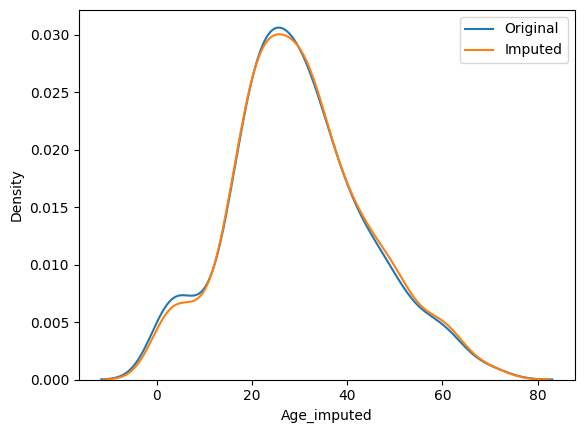

In [17]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [18]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  203.91526937194803


In [19]:
#check for covariance there is major difference
X_train[['Fare', 'Age', 'Age_imputed']].cov()


,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,40.544817
Age,71.512440,204.349513,204.349513
Age_imputed,40.544817,204.349513,203.915269


<Axes: >

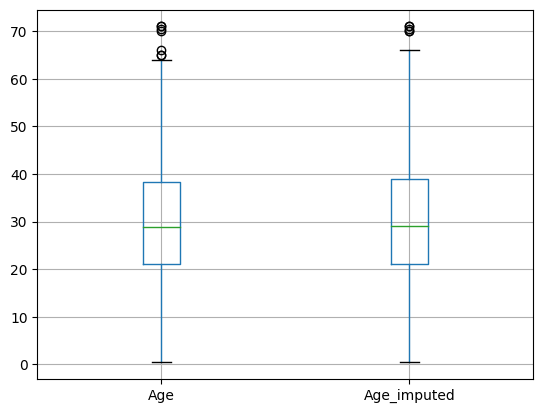

In [20]:
#not effect on outliers
X_train[['Age', 'Age_imputed']].boxplot()


In [ ]:
#for generate same output on same input during runtime on server
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))


In [23]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])


In [24]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [25]:
data.isnull().mean() * 100


FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [26]:
X = data
y = data['SalePrice']

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [28]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [29]:
X_train.sample(5)


,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
455,TA,TA,175500,TA,TA
897,NaN,TA,142953,TA,NaN
53,Gd,TA,385000,TA,Gd
986,NaN,Fa,117000,Fa,NaN
1098,NaN,TA,128000,TA,NaN


In [30]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

<ipython-input-30-f5eeca8d3074>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
<ipython-input-30-f5eeca8d3074>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
<ipython-input-30-f5eeca8d3074>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

In [31]:
#it is good work on less missing values here in 'Garagequal'
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [32]:
temp


,original,imputed
TA,0.951043,0.952055
Fa,0.037171,0.036815
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [33]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.652076
TA,0.412439,0.539843
Fa,0.040917,0.052750
Po,0.027823,0.033670
Ex,0.024550,0.032548


<ipython-input-34-1d278de3936c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
<ipython-input-34-1d278de3936c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] =

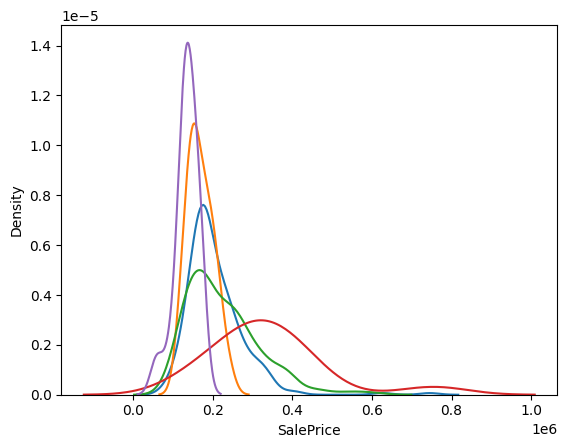

In [34]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

<ipython-input-35-e022f194d9d8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
<ipython-input-35-e022f194d9d8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['Firepla

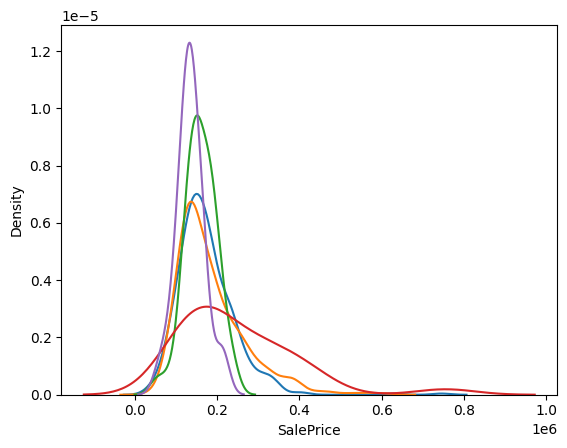

In [35]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()